# Modeling And Wrangling
Here, python libraries will be used to do some data wrangling prior to building a model:
- **Download Data from the internet**: with pandas `read_csv` we can pass a url that returns a csv
- **preview downloaded data** with the pandas `head()` method
- **Normalize Data Values** with sklearn `MinMaxScaler` and `OneHotEncoder`
- **Split data into training & testing** with sklearn `train_test_split`

In this example, some data about medical insurance will be downloaded, wrangled, and used to build a machine-learning model that can predict insurance costs based on `age`, `sex`, `bmi`, `children`, `smoking_status` and `residential_region`

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

## Download Some Data

In [2]:
dataUrl = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
dataFromWeb = pd.read_csv(dataUrl)
dataFromWeb.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Create Number-Only Data with One-Hot-Encoding

In [3]:
oheEncodedData = pd.get_dummies(dataFromWeb)
oheEncodedData.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


## Split Data: Features & Labels
The `charges` column represent the dependent variable here: the `labels`.  
All the others represent independent variables, the `features`.  

In [4]:
labelField = 'charges'
featureData = oheEncodedData.drop(labelField, axis=1)
labelData = oheEncodedData[labelField]
featureData.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


## Split Data: Train & test

In [5]:
testDataPercentage = .2 # how much of our data should we use for "testing"
randomVal = 42
feature_training_data, feature_testing_data, label_training_data, label_testing_data = train_test_split(featureData, 
                                                    labelData, 
                                                    test_size=testDataPercentage, 
                                                    random_state=randomVal) # set random state for reproducible splits

In [6]:
feature_training_data.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,True,False,True,False,False,True,False,False
1285,47,24.32,0,True,False,True,False,True,False,False,False
1142,52,24.86,0,True,False,True,False,False,False,True,False
969,39,34.32,5,True,False,True,False,False,False,True,False
486,54,21.47,3,True,False,True,False,False,True,False,False


In [7]:
label_training_data.head()

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
Name: charges, dtype: float64

## Create A Model

In [8]:
epochCount = 100
# Set random seed
tf.random.set_seed(randomVal)

# layers
denseLayer = tf.keras.layers.Dense(1)
# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential()
insurance_model.add(denseLayer)
insurance_model.add(denseLayer)

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# adjust data type to prevent error 
feature_training_data=feature_training_data.astype(np.float32)
label_training_data=label_training_data.astype(np.float32)
feature_testing_data=feature_testing_data.astype(np.float32)
label_testing_data=label_testing_data.astype(np.float32)


# Fit the model
# save output to a variable
modelHistory = insurance_model.fit(feature_training_data, label_training_data, epochs=epochCount)

Epoch 1/100
34/34 [==============================] - 1s 5ms/step - loss: 12929.0977 - mae: 12929.0977
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 12084.2998 - mae: 12084.2998
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 11257.6836 - mae: 11257.6836
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 10501.6211 - mae: 10501.6211
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 9854.5127 - mae: 9854.5127
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 9307.1348 - mae: 9307.1348
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 8834.4043 - mae: 8834.4043
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 8449.6650 - mae: 8449.6650
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 8144.5552 - mae: 8144.5552
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7902.4521 - mae: 7

## Review Model Results

In [9]:
# Check the results of the insurance model
insurance_model.evaluate(feature_testing_data, label_testing_data)

9/9 [==============================] - 0s 5ms/step - loss: 7002.0923 - mae: 7002.0923


[7002.09228515625, 7002.09228515625]

In [10]:
print(f'Training Label Median: {label_training_data.median()}')
print(f'Training Label Mean: {label_training_data.mean()}')
print(f'model MAE: {insurance_model.get_metrics_result()["mae"].numpy()}')

Training Label Median: 9575.4423828125
Training Label Mean: 13346.08984375
model MAE: 7002.09228515625


Because the MAE (mean absolute error) is so "large", the model is not great.   

### Visualize & Analyze The Loss Curve

Text(0.5, 0, 'epochs')

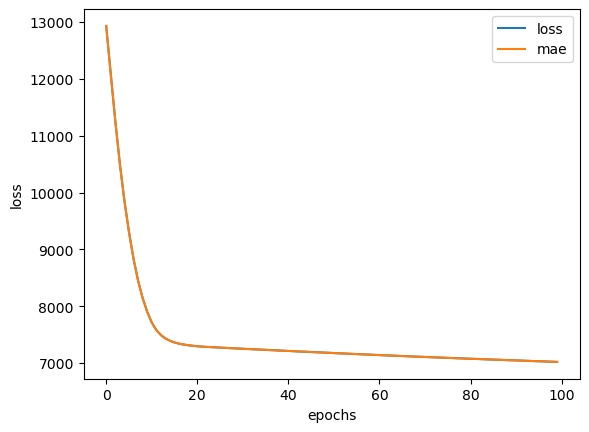

In [11]:
pd.DataFrame(modelHistory.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

The loss score took a large drop toward the beginning of the epochs.  
The loss curve "slowed down", and seems to be still dropping toward the end.  


## Experiment I
- different layers
- different optimizer fn

### Build A New Model Version

In [12]:
insurance_model_2 = tf.keras.Sequential()
modell2EpochCount = 100
# different & more layers
l1 = tf.keras.layers.Dense(100)
l2 = tf.keras.layers.Dense(10)
l3 = tf.keras.layers.Dense(1)

insurance_model_2.add(l1)
insurance_model_2.add(l2)
insurance_model_2.add(l3)

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
model_2_history = insurance_model_2.fit(feature_training_data, label_training_data, epochs=modell2EpochCount, verbose=0)

### Evaluate the model

In [13]:
insurance_model_2.evaluate(feature_testing_data, label_testing_data)

9/9 [==============================] - 0s 5ms/step - loss: 4758.9893 - mae: 4758.9893


[4758.9892578125, 4758.9892578125]

### Review Model Results

In [14]:
print(f'Training Label Median: {label_training_data.median()}')
print(f'Training Label Mean: {label_training_data.mean()}')
print(f'model_2 MAE: {insurance_model_2.get_metrics_result()["mae"].numpy()}')

Training Label Median: 9575.4423828125
Training Label Mean: 13346.08984375
model_2 MAE: 4758.9892578125


### Visualise Model Loss

Text(0.5, 0, 'epochs')

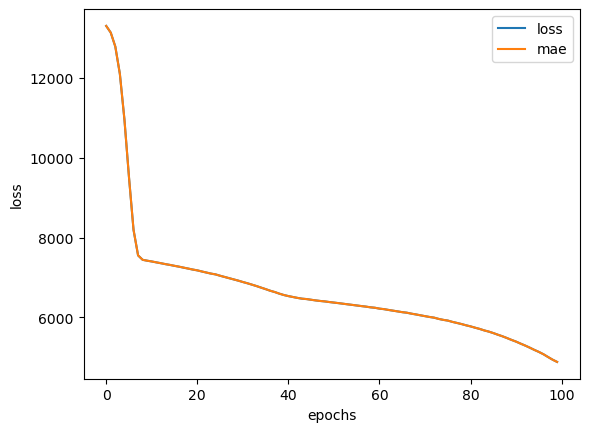

In [15]:
pd.DataFrame(model_2_history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

## Experiment II

In [16]:
insurance_model_3 = tf.keras.Sequential()
model3EpochCount = 200

insurance_model_3.add(l1)
insurance_model_3.add(l2)
insurance_model_3.add(l3)

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
model_3_history = insurance_model_3.fit(feature_training_data, label_training_data, epochs=model3EpochCount, verbose=0)

In [17]:
insurance_model_2.evaluate(feature_testing_data, label_testing_data)
print(f'Training Label Median: {label_training_data.median()}')
print(f'Training Label Mean: {label_training_data.mean()}')
print(f'model_3 MAE: {insurance_model_3.get_metrics_result()["mae"].numpy()}')

9/9 [==============================] - 0s 5ms/step - loss: 3230.5137 - mae: 3230.5137
Training Label Median: 9575.4423828125
Training Label Mean: 13346.08984375
model_3 MAE: 3515.3447265625


Text(0.5, 0, 'epochs')

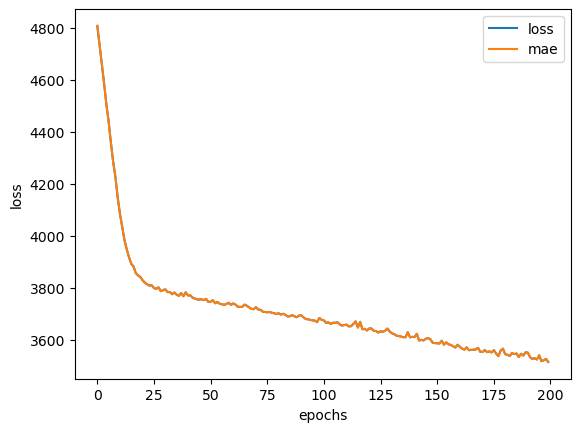

In [18]:
pd.DataFrame(model_3_history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')